## Линейная регрессия

In [ ]:
# импорт библиотек
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

Загрузим данные о заработной плате сотрудников одной специальности.

In [ ]:
df = pd.read_csv('Salary_Data.csv')

Посмотрим сами данные.

In [ ]:
df.head()

,YearsExperience,Floor,Type,Salary
0,1.1,18,1,39343.0
1,1.3,17,1,46205.0
2,1.5,10,0,37731.0
3,2.0,13,0,73525.0
4,2.2,1,0,39891.0


В данных:
- Salary — заработная плата.
- YearsExperience — опыт работы.
- Floor — этаж, на котором работает сотрудник.
- Type — тип работы: офлайн или онлайн.

Скорее всего, зарплата зависит от опыта работы сотрудников. Проверим это с помощью графиков.

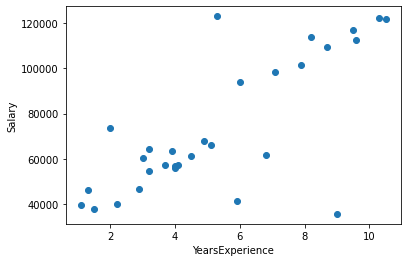

In [ ]:
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.scatter(x=df['YearsExperience'],y=df['Salary'])

Наблюдается линейная зависимость, однако в данных присутствуют выбросы.

Очевидно, что зарплата не должна зависеть от этажа, на котором работает сотрудник. Проверим это с помощью графиков.

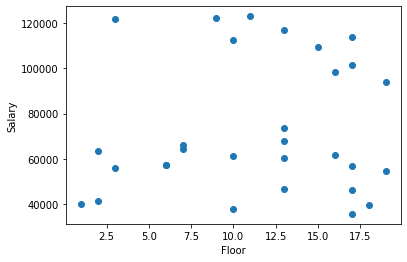

In [ ]:
plt.xlabel("Floor")
plt.ylabel("Salary")
plt.scatter(x=df['Floor'],y=df['Salary'])

Зависимости не наблюдается.

И, скорее всего, зарплата не зависит от типа работы.

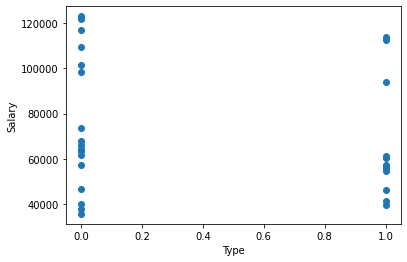

In [ ]:
plt.xlabel("Type")
plt.ylabel("Salary")
plt.scatter(x=df['Type'],y=df['Salary'])

Зависимости также не наблюдается.

Действительно, зарплата явно зависит от опыта работы сотрудника и не зависит от этажа, на котором он работает, и типа работы.

Попробуем построить модель линейной регрессии зависимости Salary от остальных параметров. И дополнительно добавим ещё признаков на незначимых переменных.

In [ ]:
df['x'] = df['Floor'] ** 2

In [ ]:
train_df, test_df  = train_test_split(df, test_size=0.3, random_state=3)

In [ ]:
train_df = train_df.sort_values(by='YearsExperience', ascending=False)
train_X = train_df[['YearsExperience', 'Floor', 'Type', 'x']]
train_y = train_df[['Salary']]

test_df = test_df.sort_values(by='YearsExperience', ascending=False)
test_X = test_df[['YearsExperience', 'Floor', 'Type', 'x']]
test_y = test_df[['Salary']]

Построим простую модель регресии на всех данных и оценим её качество.

In [ ]:
linear_regression = LinearRegression() 
linear_regression.fit(train_X, train_y)

LinearRegression()

In [ ]:
# вывод точности предсказания
print(linear_regression.score(train_X, train_y))
print(linear_regression.score(test_X, test_y))

0.5880177111217566
0.2614320695708129


In [ ]:
# коэффициенты модели
print('w_0:', linear_regression.intercept_)
coef = list(linear_regression.coef_[0])
for i in range(len(coef)):
  print(f'w_{i+1}:', coef[i], train_X.columns[i])

w_0: [20548.76734613]
w_1: 6698.547721881234 YearsExperience
w_2: 6284.331540304584 Floor
w_3: 6926.782218631161 Type
w_4: -328.8162340973986 x2


Несмотря на то, что этаж никак не влияет на целевую функцию, эта переменная присутствует в модели с коэффициентом 6698, а квадрат этой переменной — с отрицательным знаком. Что явно вносит путаницу в понимание модели.
Более того, качество модели на тестовой выборке сильно ниже, чем на обучающей.

Посмотрим на предсказания модели.

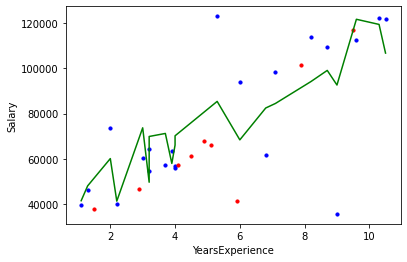

In [ ]:
y_predict_train = linear_regression.predict(train_X)

plt.scatter(train_X['YearsExperience'], train_y, s=10, c='b')
plt.scatter(test_X['YearsExperience'], test_y, s=10, c='r')
plt.plot(train_X['YearsExperience'], y_predict_train, c='g')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Воспользуемся регуляризацией.

## Lasso

Для обучения модели с L1-регуляризацией импортрируем `from sklearn.linear_model import Lasso`.

In [ ]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=0.1) # alpha — величина регуляризации

# обучение
lasso_regression.fit(train_X, train_y)

Lasso(alpha=0.1)

In [ ]:
# вывод точности предсказания
print(lasso_regression.score(train_X, train_y))
print(lasso_regression.score(test_X, test_y))

0.5880177110381943
0.26144553489542366


In [ ]:
# коэффициенты модели
print('w_0:', lasso_regression.intercept_)
print('w_i:', lasso_regression.coef_)

w_0: [20549.31008519]
w_i: [6698.52177015 6284.24112134 6926.16258239 -328.81091035]


Попробуем подобрать параметр регуляризации.

In [ ]:
coef = []
for i in range(-4, 5):
  alpha = 10**i
  lasso_regression = Lasso(alpha=alpha) # alpha — величина регуляризации

  # обучение
  lasso_regression.fit(train_X, train_y)

  coef.append(list(lasso_regression.coef_))

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(lasso_regression.score(train_X, train_y))
  print(lasso_regression.score(test_X, test_y))

----- lambda = 0.0001 -----
0.5880177111217566
0.2614320830353609
----- lambda = 0.001 -----
0.5880177111217484
0.26143220421937574
----- lambda = 0.01 -----
0.5880177111209208
0.26143341608651405
----- lambda = 0.1 -----
0.5880177110381943
0.26144553489542366
----- lambda = 1 -----
0.5880177027652842
0.26156671102812323
----- lambda = 10 -----
0.5880168754579568
0.26277701851840796
----- lambda = 100 -----
0.5879342374354077
0.2747203768704247
----- lambda = 1000 -----
0.5796934531913986
0.3791523421746924
----- lambda = 10000 -----
0.5060302010854069
0.42820120868058864


In [ ]:
coef = pd.DataFrame(coef, columns=train_X.columns)
coef

,YearsExperience,Floor,Type,x2
0,6698.547696,6284.331450,6926.781599,-328.816229
1,6698.547462,6284.330636,6926.776022,-328.816181
2,6698.545127,6284.322499,6926.720255,-328.815702
3,6698.521770,6284.241121,6926.162582,-328.810910
4,6698.288210,6283.427289,6920.585815,-328.762994
5,6695.952637,6275.288584,6864.817882,-328.283808
6,6672.576323,6194.150782,6307.306095,-323.503855
7,6438.319469,5388.751357,736.206886,-275.989714
8,5960.493518,0.000000,0.000000,-24.824674


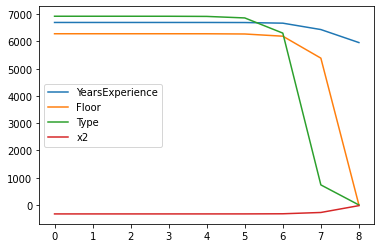

In [ ]:
coef.plot()

Посмотрим, как изменились предсказания модели.

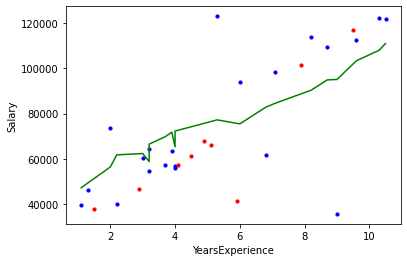

In [ ]:
y_predict_train = lasso_regression.predict(train_X)

plt.scatter(train_X['YearsExperience'], train_y, s=10, c='b')
plt.scatter(test_X['YearsExperience'], test_y, s=10, c='r')
plt.plot(train_X['YearsExperience'], y_predict_train, c='g')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Видим, что при правильном подборе параметра `lambda` с помощью регуляризации можно не только упростить модель, но и повысить её качество. При этом коэффициент при переменных, которые незначимы, приблизится к нулю.